# Task. 2 Discrete Models
### Ivan Dubinin, 335433, J41321

#### - Perform a sensitivity analysis for a demographic model with respect to a set of parameters: fertility rate, boys/girls ratio, «survival» rate for different age groups (not all can be taken). Model output: number of inhabitants for a given year. Test on the final forecast values ​​for 10, 20, 50, 100 years.
#### - Define ranges of model parameter values ​​from data for previous periods (1950-2000)
#### - Based on all ranges of parameter values, perform an uncertainty analysis in the form of a graph with confidence intervals of the results. The values ​​between the boundaries can be considered evenly distributed.


In [246]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

from SALib.sample import saltelli
from SALib.analyze import sobol

### Load Dataset

In [247]:
# Load Dataset
path_to_src_file = "Japan_Stats.csv"

source_df = pd.read_csv(path_to_src_file, delimiter=';', engine='python', decimal=',')
source_df["100+"] = source_df["100+"].astype('float')
source_df

,Index,Sex,Country,Code,Year,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
0,75,m,Japan,392,1950,5699.000,4901.000,4452.000,4354.000,3844.000,...,1380.000,1107.000,799.000,543.000,269.000,126.000,NaN,NaN,NaN,NaN
1,75,m,Japan,392,1955,4864.000,5608.000,4883.000,4383.000,4220.000,...,1606.000,1225.000,915.000,595.000,344.000,173.001,NaN,NaN,NaN,NaN
2,75,m,Japan,392,1960,4079.000,4842.000,5548.000,4742.000,4134.000,...,1806.000,1446.000,1030.000,703.000,382.000,227.999,NaN,NaN,NaN,NaN
3,75,m,Japan,392,1965,4185.000,4071.000,4802.000,5437.000,4545.000,...,1930.000,1630.000,1216.000,787.000,451.000,261.000,NaN,NaN,NaN,NaN
4,75,m,Japan,392,1970,4550.000,4212.000,4054.000,4608.000,5328.000,...,2049.000,1761.000,1403.000,965.000,535.000,332.997,NaN,NaN,NaN,NaN
5,75,m,Japan,392,1975,5099.000,4566.000,4227.000,4069.000,4604.000,...,2072.000,1928.000,1563.000,1140.000,680.000,425.000,NaN,NaN,NaN,NaN
6,75,m,Japan,392,1980,4407.065,5119.698,4582.225,4219.839,3993.499,...,2490.654,1947.969,1736.879,1310.324,840.974,581.226,NaN,NaN,NaN,NaN
7,75,m,Japan,392,1985,3814.195,4367.498,5140.524,4594.212,4160.759,...,3404.711,2377.005,1778.760,1502.107,1015.720,796.998,NaN,NaN,NaN,NaN
8,75,m,Japan,392,1990,3363.761,3864.518,4425.084,5117.087,4472.082,...,3780.212,3201.135,2181.490,1563.923,1192.944,1026.427,NaN,NaN,NaN,NaN
9,75,m,Japan,392,1995,3072.029,3352.024,3829.478,4388.652,5044.535,...,3909.183,3614.317,3000.673,1942.832,1261.238,825.033,362.194,100.285,15.715,1.206


In [248]:
def get_df_row(dataframe, sex, year):
    return dataframe.loc[(dataframe['Sex'] == sex) & (dataframe['Year'] == year)]

def get_data_from_df(dataframe, sex = "m", year = 2050):
    try:
        return get_df_row(dataframe, sex, year)[ages].values.flatten().tolist()
    except:
        return None

In [249]:

ages  =  ["%d - %d" % (i, i+4) for i in range(0, 99, 5)]
ages.append("100+")
print(ages)

# Difference between dataframe (returned from .loc[] row) and series (returned from .iloc[] row)
print(type( get_df_row(source_df, "m", 2000)))
print(type( get_df_row(source_df, "m", 2000)["0 - 4"]))
print( get_df_row(source_df, "m", 2000)["0 - 4"])

print(type(source_df.iloc[10]))
print(type(source_df.iloc[10].loc["0 - 4"]))
print(source_df.iloc[10].loc["0 - 4"])



['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
10    3109.086
Name: 0 - 4, dtype: float64
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
3109.086


In [250]:

def get_possible_mothers(year):
    return reduce(lambda x, y: x+y, women[year].loc[ages[4:8]])

## 1. Precalculate model parameters and Define their ranges

- Survival rate for each year group
- Fertility rate
- Girls/Boys ratio

The input for model is the population distribution in Japan in 2005 year

In [251]:
# Calculate parameters and their ranges

men = {}
men[1950] = get_df_row(source_df, "m", 1950).iloc[0] # Convert to pandas Series

women = {}
women[1950] = get_df_row(source_df, "f", 1950).iloc[0]
# Men survival rates
_men_surv = {}
_men_surv_max = {}
_men_surv_min = {}
# Women survival rates
_women_surv = {}
_women_surv_max = {}
_women_surv_min = {}

_fert_rate_max = 0.
_fert_rate_min = 10. # This value is unreachable

_girls_boys_rate_max = 0.
_girls_boys_rate_min = 1.

for cur_year in range(1955, 2005+5, 5):

    men[cur_year] = get_df_row(source_df, "m", cur_year).iloc[0]
    women[cur_year] = get_df_row(source_df, "f", cur_year).iloc[0]
    prev_year = cur_year - 5


    for it in range(0, len(ages) - 2):
        surv_coef = men[cur_year].loc[ages[it + 1]]/men[prev_year].loc[ages[it]]
        if np.isnan(surv_coef):
            break
        _men_surv[ages[it]] = surv_coef
        if _men_surv_max.get(ages[it]) == None: 
             _men_surv_max[ages[it]] = surv_coef
             _men_surv_min[ages[it]] = surv_coef
        else:
            if surv_coef > _men_surv_max[ages[it]]:
                _men_surv_max[ages[it]] = surv_coef
            elif surv_coef < _men_surv_min[ages[it]]:
                _men_surv_min[ages[it]] = surv_coef
    # 100+ groups is formed from 95-99 and 100+ prev groups
    surv_coef = men[cur_year].loc[ages[it + 1]]/(men[prev_year].loc[ages[it]] + men[prev_year].loc[ages[it + 1]])
    if not np.isnan(surv_coef):
        _men_surv[ages[it+1]] = surv_coef
        if _men_surv_max.get(ages[it+1]) == None:
                _men_surv_max[ages[it+1]] = surv_coef
                _men_surv_min[ages[it+1]] = surv_coef
        else:
            if surv_coef > _men_surv_max[ages[it+1]]:
                _men_surv_max[ages[it+1]] = surv_coef
            elif surv_coef < _men_surv_min[ages[it+1]]:
                _men_surv_min[ages[it+1]] = surv_coef



    for it in range(0, len(ages) - 2):
        surv_coef = women[cur_year].loc[ages[it + 1]]/women[prev_year].loc[ages[it]]
        if np.isnan(surv_coef):
            break
        _women_surv[ages[it]] = surv_coef
        if _women_surv_max.get(ages[it]) == None:
             _women_surv_max[ages[it]] = surv_coef
             _women_surv_min[ages[it]] = surv_coef
        else:
            if surv_coef > _women_surv_max[ages[it]]:
                _women_surv_max[ages[it]] = surv_coef
            elif surv_coef < _women_surv_min[ages[it]]:
                _women_surv_min[ages[it]] = surv_coef
    # 100+ groups is formed from 95-99 and 100+ prev groups
    surv_coef = women[cur_year].loc[ages[it + 1]]/(women[prev_year].loc[ages[it]] + women[prev_year].loc[ages[it + 1]])
    if not np.isnan(surv_coef):
        _women_surv[ages[it+1]] = surv_coef
        if _women_surv_max.get(ages[it+1]) == None:
                _women_surv_max[ages[it+1]] = surv_coef
                _women_surv_min[ages[it+1]] = surv_coef
        else:
            if surv_coef > _women_surv_max[ages[it+1]]:
                _women_surv_max[ages[it+1]] = surv_coef
            elif surv_coef < _women_surv_min[ages[it+1]]:
                _women_surv_min[ages[it+1]] = surv_coef



    children_born = men[cur_year].loc[ages[0]] + women[cur_year].loc[ages[0]]
    possible_mothers = get_possible_mothers(prev_year)
    _fert_rate = children_born / possible_mothers
    if _fert_rate > _fert_rate_max:
        _fert_rate_max = _fert_rate
    elif _fert_rate < _fert_rate_min:
        _fert_rate_min = _fert_rate

    _girls_boys_rate = women[cur_year].loc[ages[0]] / men[cur_year].loc[ages[0]]
    if _girls_boys_rate > _girls_boys_rate_max:
        _girls_boys_rate_max = _girls_boys_rate
    elif _girls_boys_rate < _girls_boys_rate_min:
        _girls_boys_rate_min = _girls_boys_rate


print("_men_surv: ", _men_surv)
print("_women_surv", _women_surv)
print("fert_rate: %f" %(_fert_rate))
print("girls_boys_rate: %f" %(_girls_boys_rate))

print("_men_surv_max: ", _men_surv_max)
print("_men_surv_min: ", _men_surv_min)
print("_women_surv_max", _women_surv_max)
print("_women_surv_min", _women_surv_min)
print("_fert_rate_max: %f" %(_fert_rate_max))
print("_fert_rate_min: %f" %(_fert_rate_min))
print("_girls_boys_rate_max: %f" %(_girls_boys_rate_max))
print("_girls_boys_rate_min: %f" %(_girls_boys_rate_min))

_men_surv:  {'0 - 4': 1.0001447370706376, '5 - 9': 1.0002620301969458, '10 - 14': 1.0030429345809333, '15 - 19': 1.0041263786832944, '20 - 24': 1.0025538252403892, '25 - 29': 1.000200486868407, '30 - 34': 0.998260796991125, '35 - 39': 0.9954755503031388, '40 - 44': 0.990976823910233, '45 - 49': 0.9835021406847871, '50 - 54': 0.9729925608033866, '55 - 59': 0.9584357452823681, '60 - 64': 0.9341892889056744, '65 - 69': 0.8958465420816528, '70 - 74': 0.8361895035837575, '75 - 79': 0.7379853583435448, '80 - 84': 0.597963151209942, '85 - 89': 0.43330770585380307, '90 - 94': 0.27021020979312355, '95 - 99': 0.23131249479829263}
_women_surv {'0 - 4': 1.0005223784341546, '5 - 9': 1.0006199519964403, '10 - 14': 1.0043668970469324, '15 - 19': 1.0064278573781449, '20 - 24': 1.0046767716210694, '25 - 29': 1.0021219419720615, '30 - 34': 1.0005435036472499, '35 - 39': 0.9986008034417844, '40 - 44': 0.9961228396489926, '45 - 49': 0.9924544445337258, '50 - 54': 0.9881091460210075, '55 - 59': 0.982499980

### Model definition

All in all the simulation is based on the following recurent equations

- Men["0-4"][n] = Women["20-39"][n-1] * fertility_rate * boys_rate
- Women["0-4"][n] = Women["20-39"][n-1] * fertility_rate * girls_rate
- Men["4-100+"][n] = Men["0-100+"][n-1] * men_survival_rate
- Women["4-100+"][n] = Women["0-100+"][n-1] * women_survival_rate

In [252]:


def Model(dataframe, fert_rate = _fert_rate, girls_boys_rate = _girls_boys_rate):
    simul_years = np.arange(2010, 2010 + PREDICT_DISTANCE - 5, 5)

    for cur_year in simul_years:

        prev_year = cur_year - 5

        men[cur_year] = source_df.iloc[0].copy() # Make DF row with placeholder data
        men[cur_year].loc["Year"] = cur_year
        men[cur_year].loc["Sex"] = "m"
        women[cur_year] = source_df.iloc[0].copy() # Make DF row with placeholder data
        women[cur_year].loc["Year"] = cur_year
        women[cur_year].loc["Sex"] = "f"


        for it, age in enumerate(ages):
            if age == "0 - 4":
                possible_mothers = get_possible_mothers(prev_year)
                new_children = possible_mothers * fert_rate
                men[cur_year].loc[age] = new_children / girls_boys_rate * 0.5
                women[cur_year].loc[age] = new_children * girls_boys_rate * 0.5
            else:
                men[cur_year].loc[age] = men[prev_year].loc[ages[it-1]] * _men_surv[ages[it-1]]
                women[cur_year].loc[age] = women[prev_year].loc[ages[it-1]] * _women_surv[ages[it-1]]

        dataframe = dataframe.append(men[cur_year], ignore_index=True)
        dataframe = dataframe.append(women[cur_year], ignore_index=True)

    return dataframe
    

In [253]:
# Do simulation

def Simulate(param_values):

    Y = []

    for params in param_values:
        fert_rate, girls_boys_rate = params[0:2]

        surv_rates = params[2:]

        _women_surv["25 - 29"] = surv_rates[0]
        _women_surv["65 - 69"] = surv_rates[1]
        _women_surv["75 - 79"] = surv_rates[2]
        _women_surv["85 - 89"] = surv_rates[3]

        _men_surv["25 - 29"] = surv_rates[4]
        _men_surv["65 - 69"] = surv_rates[5]
        _men_surv["75 - 79"] = surv_rates[6]
        _men_surv["75 - 79"] = surv_rates[7]

        fin_df = pd.DataFrame()

        fin_df = Model(fin_df, fert_rate, girls_boys_rate)
            
        output = sum(get_data_from_df(fin_df, "m", LAST_YEAR)) + sum(get_data_from_df(fin_df, "f", LAST_YEAR))
        
        fin_df.drop(fin_df.index, inplace=True)

        Y.append(output)

    return np.array(Y)

In [254]:
# Define the model inputs and argument boundaries
gb_boost_c = 0.9

problem = {
    'num_vars': 10,
    'names': ['fert_rate', 'girls_boys_rate', 'f_25_surv', 'f_65_surv', 'f_75_surv', 'f_85_surv', 'm_25_surv', 'm_65_surv', 'm_75_surv', 'm_85_surv',],
    'bounds': [[_fert_rate_min, _fert_rate_max],
               [_girls_boys_rate_min * gb_boost_c, _girls_boys_rate_max / gb_boost_c],
               [_women_surv_min["25 - 29"], _women_surv_max["25 - 29"]],
               [_women_surv_min["65 - 69"], _women_surv_max["65 - 69"]],
               [_women_surv_min["75 - 79"], _women_surv_max["75 - 79"]],
               [_women_surv_min["85 - 89"], _women_surv_max["85 - 89"]],
               [_men_surv_min["25 - 29"], _men_surv_max["25 - 29"]],
               [_men_surv_min["65 - 69"], _men_surv_max["65 - 69"]],
               [_men_surv_min["75 - 79"], _men_surv_max["75 - 79"]],
               [_men_surv_min["85 - 89"], _men_surv_max["85 - 89"]]]
}

## 2. Sensitivity analysis

In [255]:
# Generate samples
param_values = saltelli.sample(problem, 100)

si_coefs = {}
modeling_periods = [10, 20, 50, 100, 200]
modeling_years = []
model_outputs = {}

for period in modeling_periods:

    PREDICT_DISTANCE = period
    LAST_YEAR = 2000 + PREDICT_DISTANCE
    modeling_years.append(LAST_YEAR)

    model_outputs[period] = Simulate(param_values)

    # Perform analysis
    si_coefs[period] = sobol.analyze(problem, model_outputs[period], print_to_console=False)

    # Print the first-order sensitivity indices
    print("___________PERIOD: %d__________" % period)
    print("fertility rate:  %f " % si_coefs[period]['S1'][0])
    print("girls/boys rate: %f " % si_coefs[period]['S1'][1])
    print("survival rate:   %f " % sum(si_coefs[period]['S1'][2:]))
    
fert_coefs = [si_coefs[period]['S1'][0] for period in modeling_periods]
gb_coefs = [si_coefs[period]['S1'][1] for period in modeling_periods]
surv_coefs = [sum(si_coefs[period]['S1'][2:]) for period in modeling_periods]

c:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\SALib\sample\saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (100) is equal to `2^n`.
        
  warnings.warn(msg)


___________PERIOD: 10__________
fertility rate:  0.947253 
girls/boys rate: -0.000522 
survival rate:   0.067983 
___________PERIOD: 20__________
fertility rate:  0.957258 
girls/boys rate: -0.000412 
survival rate:   0.056475 
___________PERIOD: 50__________
fertility rate:  1.014589 
girls/boys rate: 0.009420 
survival rate:   0.007585 
___________PERIOD: 100__________
fertility rate:  1.013447 
girls/boys rate: 0.047091 
survival rate:   0.001013 
___________PERIOD: 200__________
fertility rate:  0.943305 
girls/boys rate: 0.095899 
survival rate:   0.000100 


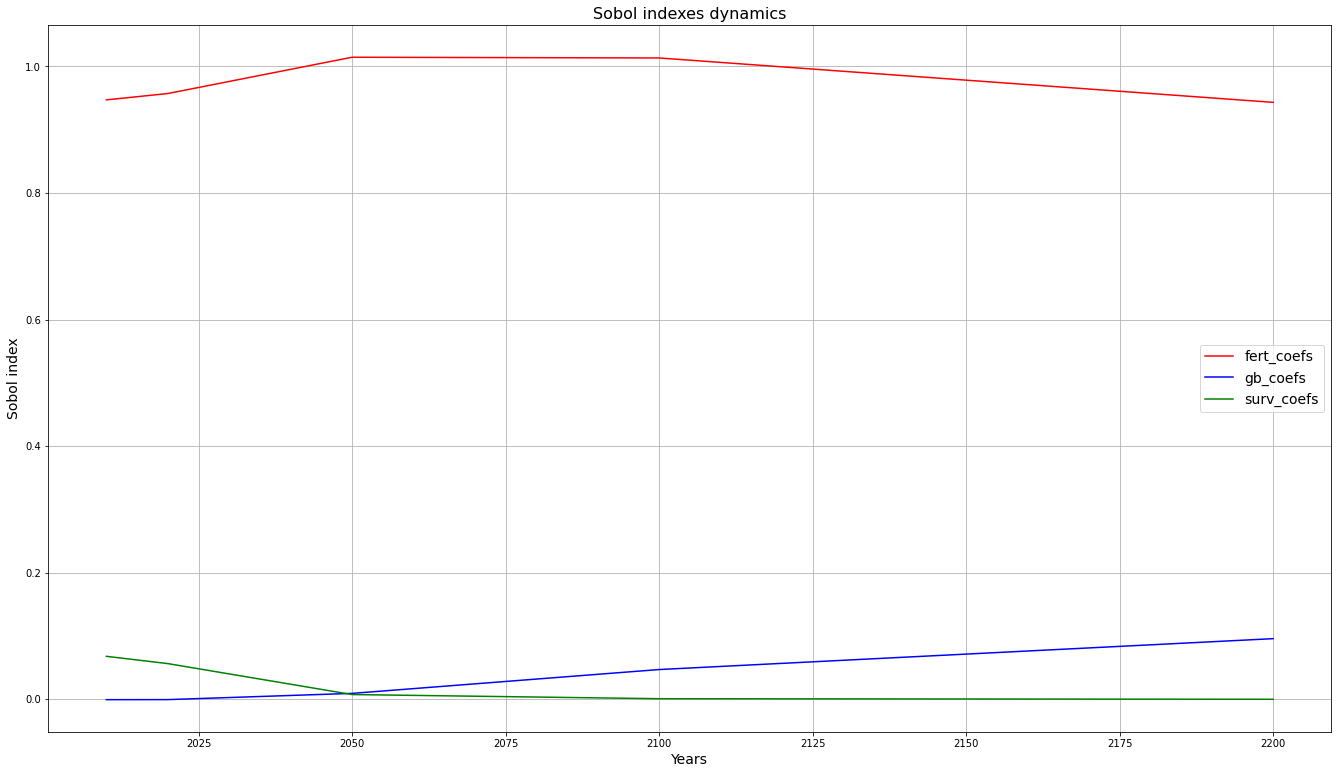

In [256]:
plt.figure(figsize=(23,13))

plt.plot(modeling_years, fert_coefs, c = "r", label = "fert_coefs")
plt.plot(modeling_years, gb_coefs, c = "b", label = "gb_coefs")
plt.plot(modeling_years, surv_coefs, c = "g", label = "surv_coefs")

plt.legend(fontsize = 14)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Sobol index", fontsize = 14)
plt.title("Sobol indexes dynamics", fontsize = 16)
plt.grid(True)

## 3. Uncertainty analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


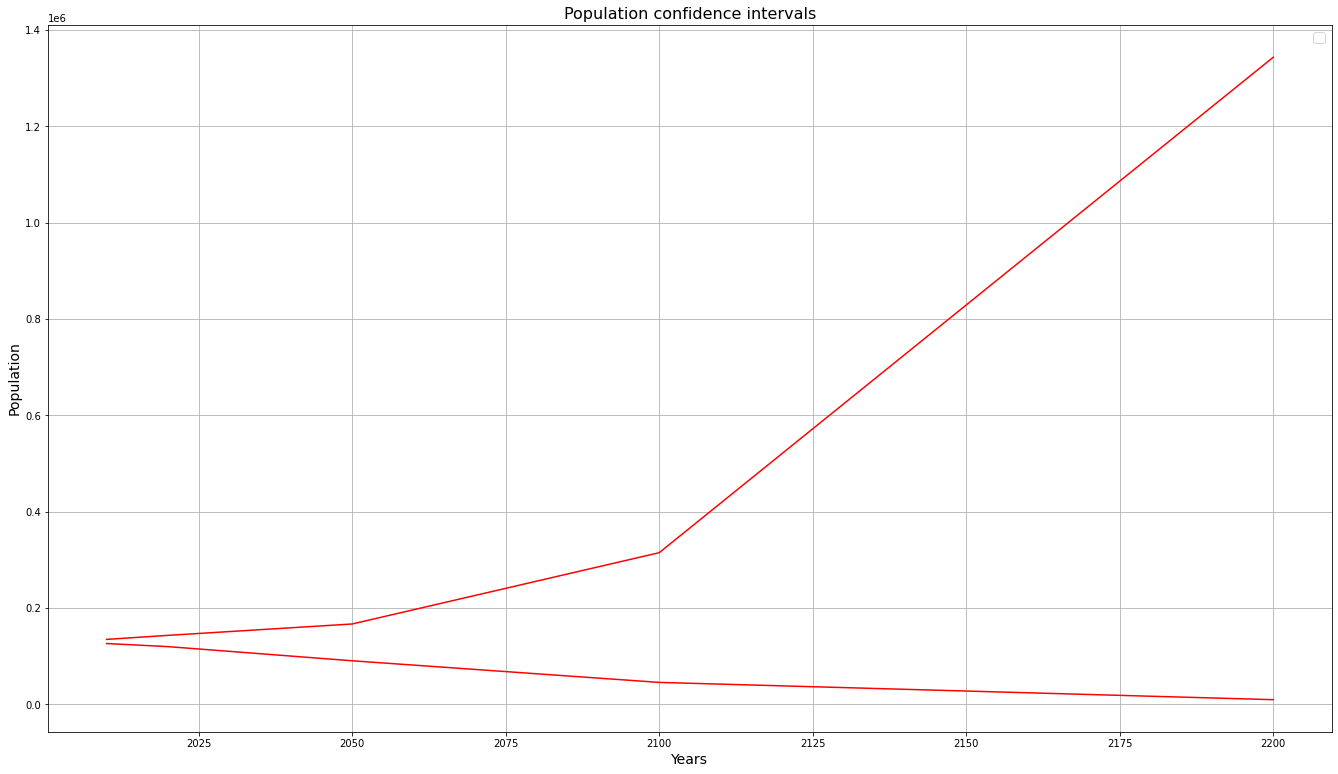

In [257]:

plt.figure(figsize=(23,13))

# for idx, period in enumerate(modeling_periods):
#     plt.scatter([modeling_years[idx] for i in range(len(model_outputs[period]))], model_outputs[period], c = "r")

plt.plot(modeling_years, [max(model_outputs[period]) for period in modeling_periods], c = "r")
plt.plot(modeling_years, [min(model_outputs[period]) for period in modeling_periods], c = "r")

plt.legend(fontsize = 14)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Population", fontsize = 14)
plt.title("Population confidence intervals", fontsize = 16)
plt.grid(True)



## Conclusions
The sensivity analysis and uncertainty analysis were made after defining ranges for the selected parameters.
For sensivity analysis different paraneters have different importance for different perionds. For short distance survival coefficients have significant sensitivity index, but for longer periods their sensitivity index becomes almost equal to zero. At the same time the importance of girls/boys birth ratio becomes more important for longer periods. Fertility rate has the highes and most stable sensitivity index.
Uncertainty analysis showes that with the increase of period length the confidence intervals for population expand tremendously 